In [1]:
import lbg_forecast.sps as sps
import lbg_forecast.sfh as sfh
import lbg_forecast.cosmology as cosmo
import lbg_forecast.emulator as em
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sps_model_igm=sps.initialise_sps_model(neb_em=False, igm=True)
sps_model_no_igm=sps.initialise_sps_model(neb_em=False, igm=False)
mimic = em.fsps_emulator("./")

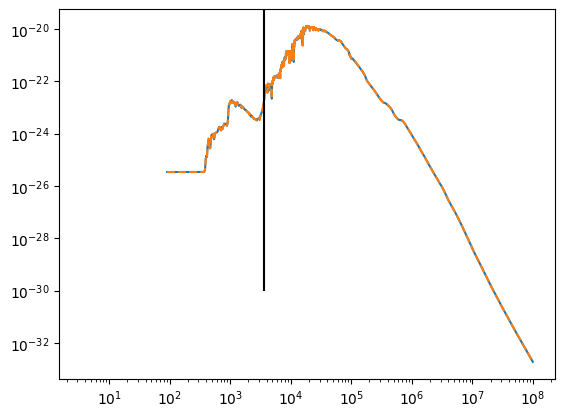

In [3]:
redshift=np.arange(0.01, 4.0, 1.0)
phot1 = []
phot2 = []
em1 = []

#zz=5.0
for z in redshift:
    
    sps_params = np.array([z, 0.0, 0.0, 0.0, 0.0, 1.0, -1, 0.0, 0, 100, -1, np.random.uniform(-5, 5), 0, -1, -1, -1, 10**10])
    sps_param_resize = sps_params.reshape((1, sps_params.shape[0]))
    #em1.append(mimic.mimic_photometry(sps_param_resize, 1)[0])

    sps.update_model(sps_model_igm, sps_params, False, sfh.default_agebins())
    sps.update_model(sps_model_no_igm, sps_params, False, sfh.default_agebins())

    mag1, spec1data = sps.get_magnitudes(sps_model_igm, filters='lsst', cosmology=cosmo.get_wmap9(), modify_igm=False, return_spec=True, lya_uncertainity=False, path="./")
    mag2, spec2data = sps.get_magnitudes(sps_model_no_igm, filters='lsst', cosmology=cosmo.get_wmap9(), modify_igm=True, return_spec=True, lya_uncertainity=False, path="./")
    phot1.append(mag1)
    phot2.append(mag2)

phot1 = np.array(phot1)
phot2 = np.array(phot2)
#em1 = np.array(em1)


phot1[:, 0], phot2[:, 0]

plt.plot(spec1data[0], spec1data[1])
plt.plot(spec2data[0], spec2data[1], ls='--')
plt.xscale("log")
plt.yscale("log")

#plt.xlim(1e3, 1e5)

plt.vlines(911.75*(1+z), 1e-30, 1e-19, colors='k')

1.2430357142964634e-24


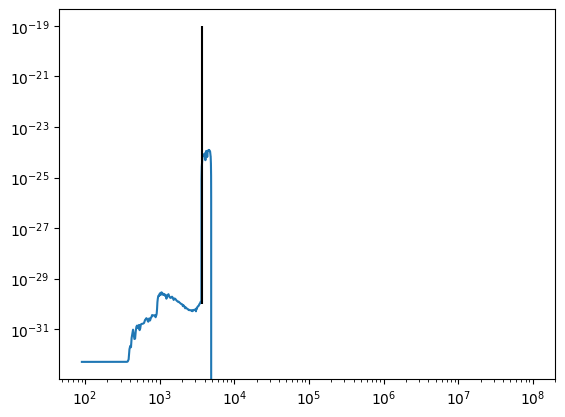

In [4]:
plt.plot(spec1data[0], abs(spec1data[1] -  spec2data[1]))
plt.vlines(911.75*(1+z), 1e-30, 1e-19, colors='k')
plt.xscale("log")
plt.yscale("log")

print(max(abs(spec1data[1] - spec2data[1])))

[[17.08392935 15.42916502 14.70827213 14.31948023 14.01301488 13.81444568]
 [31.26601669 29.48445648 27.2336653  26.11839236 25.19875791 24.73625101]
 [29.92255143 29.62633667 29.32179403 28.99873071 28.21136323 27.50299093]
 [35.59320411 34.27028427 32.99005722 31.33640502 30.21366435 30.12112188]] [[17.08392935 15.42916502 14.70827213 14.31948023 14.01301488 13.81444568]
 [31.26601669 29.48445648 27.2336653  26.11839236 25.19875791 24.73625101]
 [29.91924033 29.62633662 29.32179403 28.99873068 28.21136321 27.5029909 ]
 [35.58292663 34.26450903 32.99005714 31.33640496 30.21366432 30.12112181]]


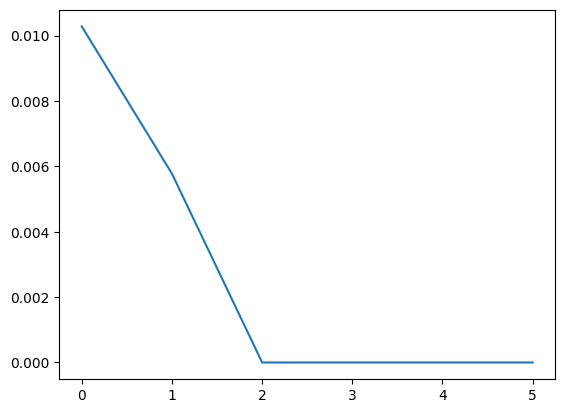

In [5]:
print(phot1, phot2)
plt.plot(phot1[3,:] - phot2[3,:])

In [6]:
igm_factor = 1.0
sps_params = np.array([4.0, 0.1, 0.5, 0.1, 0.0, igm_factor, -3, 0.0, 10**-2, 10, 1, -1, 1, -1, -1, -1, 10**12])
sps_param_resize = sps_params.reshape((1, sps_params.shape[0]))
mimic.mimic_photometry(sps_param_resize, 1)[0]

/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])


array([32.13609937, 27.54727228, 25.54964097, 25.21407041, 24.96451632])